# Xi0Stat Tutorial

## Setup

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from astropy.cosmology import FlatLambdaCDM

In [44]:
%cd ../

/Users/af/Work/Cosmo/codes


In [45]:
from Xi0Stat.globals import * 
from Xi0Stat.GW import get_all_events
from Xi0Stat.GLADE import GLADE
from Xi0Stat.GWENS import GWENS
from Xi0Stat.SYNTH import SYNTH
from Xi0Stat.completeness import *
from Xi0Stat.galCat import GalCompleted
from Xi0Stat.GWgal import GWgal
from Xi0Stat.betaHom import BetaHom

In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## GW

This module is based on the object Skymap3D. This contains the GW skymap for a single GW event denoted by its name - a string accessible by the attribute self.event_name. E.g.: 'GW170817'
Main attributes:
- npix: N of pixels
- nside : skymap nside
- pixarea: area of a pixel in rad^2
- p: probability in a pixel (the rho of Singer et al.)
- mu, sigma, norm: mu, sigma, N of the skymap 
- metadata: the metadata of the event. The metadata file should be a .csv file in the folder data/GW/metadata (editable in globals/metaPath). For O2, it should be called GWTC-1-confident.csv . The file in csv is downloadable at https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/

Key methods to compute likelihood:

- likelihood(self, r, theta, phi) : likelihood given GW lum distance r, and polar angles theta, phi in radians 
- likelihood_px(self, r, pix) : lileihood  given GW lum distance r and pixel

(Note that the likelihood is a Gaussian truncated at zero. )

- likelihood_in_credible_region(self, r, level=0.99,) : likelihood in all the pixels of the credible region specified by level at given GW lum disance r
- d_max(self, SNR_ref=8): Max GW luminosity distance at which the evend could be seen, assuming its SNR and a threshold SNR_ref:d_max = d_obs*SNR/SNR_ref
- get_zlims(self, H0max=220, H0min=20, Xi0max=3, Xi0min=0.2) : Computes the possible range in redshift for the event given the prior range for H0 and XI0



Other: the module contains the function get_all_events(loc='data/GW/O2/', subset, subset_names) , that reads all the skymaps in the folder specified by loc and returns a dictionary {event name: Skymap3D}

If subset=True, the dictionary will contain only the events specified in subset_names, which should be a list of names, e.g. : get_all_events(loc='data/GW/O2/', subset=True, subset_names=['GW170817',]) to return skymap of GW170817

## Set global prior range! 
reload GW events after change! 
reset GWgal object after change to either GWs or gal! 

In [152]:
H0minGlob = 5
H0maxGlob = 220
Xi0minGlob = 1#0.01
Xi0maxGlob = 1#100

In [153]:
# Example: load skymaps of O2 events GW170817 

#O2 = get_all_events(loc='data/GW/O2/', subset=True, subset_names=['GW170817',])
O2 = get_all_events(loc='data/GW/O2/', level=0.96)
#O3 = get_all_events(loc='data/GW/O3/', level=0.96)
#O2 = O3

/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "
/Users/af/miniconda3/envs/cobenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [154]:
O2.keys()

dict_keys(['GW151226', 'GW170817', 'GW170818', 'GW170608', 'GW170814', 'GW170809', 'GW151012', 'GW170104', 'GW170823', 'GW150914'])

In [155]:
# Example: check area of the 90% credible region of GW170817

O2['GW170817'].area(level=0.9)

16.15640267031496

## Completeness

In [64]:
compl = SkipCompleteness()

goal = get_SchNorm(phistar=phiBstar07, Lstar=LBstar07, alpha=alphaB07, Lcut=0.6)
#goal = 0.1

compl = MaskCompleteness(comovingDensityGoal=goal, nMasks=5, zRes=40)



#compl = SuperpixelCompleteness(comovingDensityGoal=goal, angularRes=4, interpolateOmega=False, zRes=40)

## GLADE

In [56]:
# uncomment to compute posteriors and save. then put file into GLADE folder, comment, and proceed. 
#skipcompl = SkipCompleteness()
#glade = GLADE('GLADE', skipcompl, useDirac=False, computePosterior=False, verbose=True, colnames_final = ['theta','phi','z','z_err', 'z_lower', 'z_lowerbound', 'z_upper', 'z_upperbound', 'w', 'K', 'B_Abs'])
# glade.data.to_csv('posteriorglade.csv', index=False)  

## ---------------------------------------------------------- ##

#glade = GLADE('GLADE', compl, useDirac=False, finalData='posteriorglade.csv', verbose=True)
band = 'B'
Lcut = 0.6
glade = GLADE('GLADE', compl, useDirac=False, finalData='posteriorglade.csv', verbose=True, band=band, Lcut=Lcut)


Directly loading final data posteriorglade.csv
Computing total luminosity in B band...
Applying cut in luminosity in B-band. Selecting galaxies with B_Lum>0.6 x L_* = 1.47
Kept 1148638 points or 42% of total
Using B_Lum for weighting
Keeping only columns: ['theta', 'phi', 'z', 'z_err', 'z_lower', 'z_lowerbound', 'z_upper', 'z_upperbound', 'w']
Done.
Computing completeness
Making masks...
Preparing further... 
Computing in parallel... 
Final computations for completeness...
Done.


## Completeness and GW events

(367.371992586242, 66.62117450983867, 668.1228106626455, 100.25027269213446)


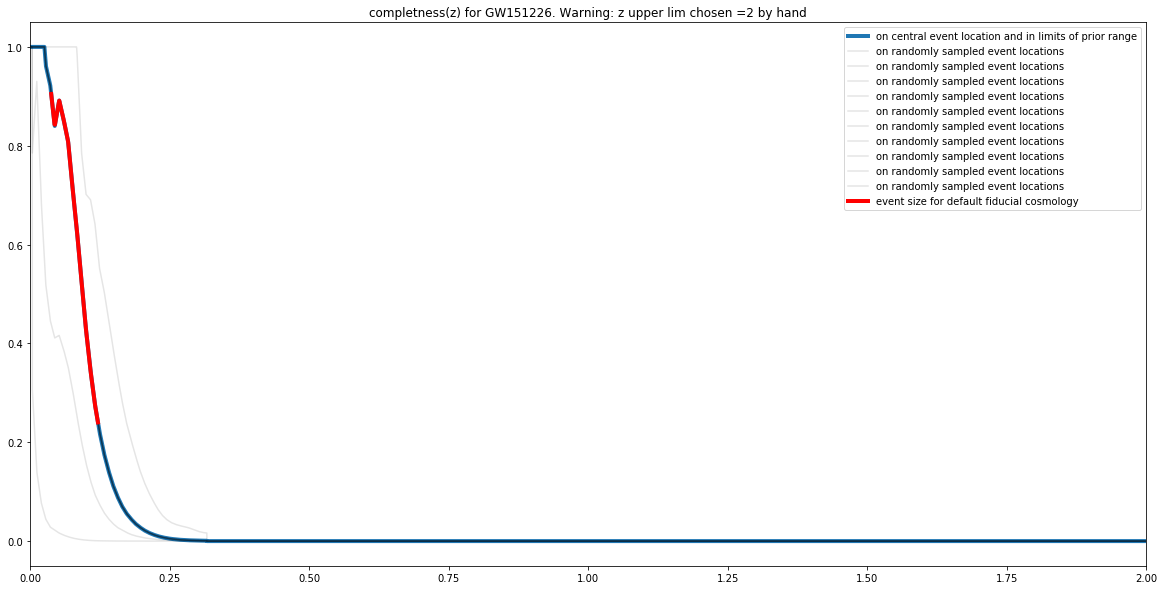

(34.47371181802117, 11.1593776724752, 57.78804596356715, 7.7714447151819925)


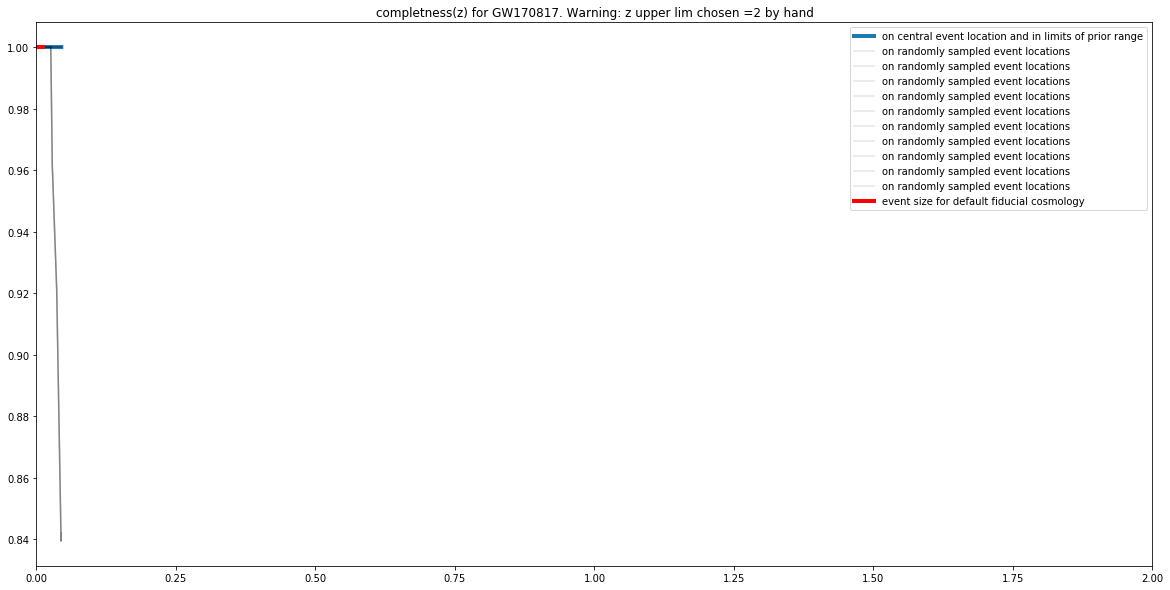

(925.3405369254622, 137.9051108055548, 1712.7759630453693, 262.4784753733024)


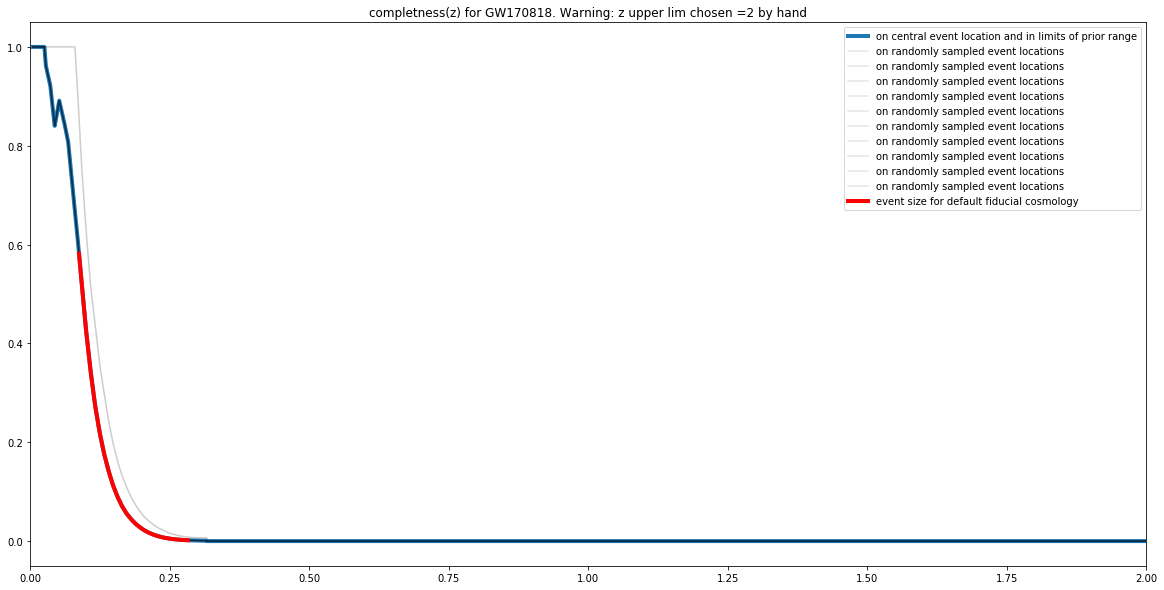

(298.15340844714916, 127.80828909014403, 468.49852780415426, 56.781706452335044)


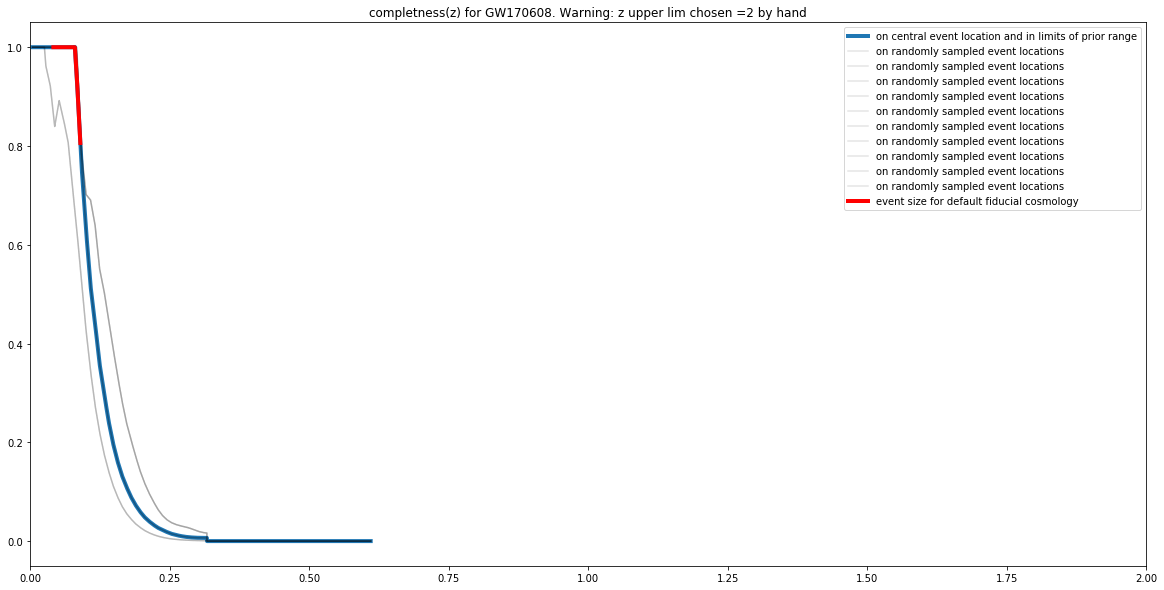

(533.3712696169604, 214.46716992299676, 852.2753693109238, 106.3013665646545)


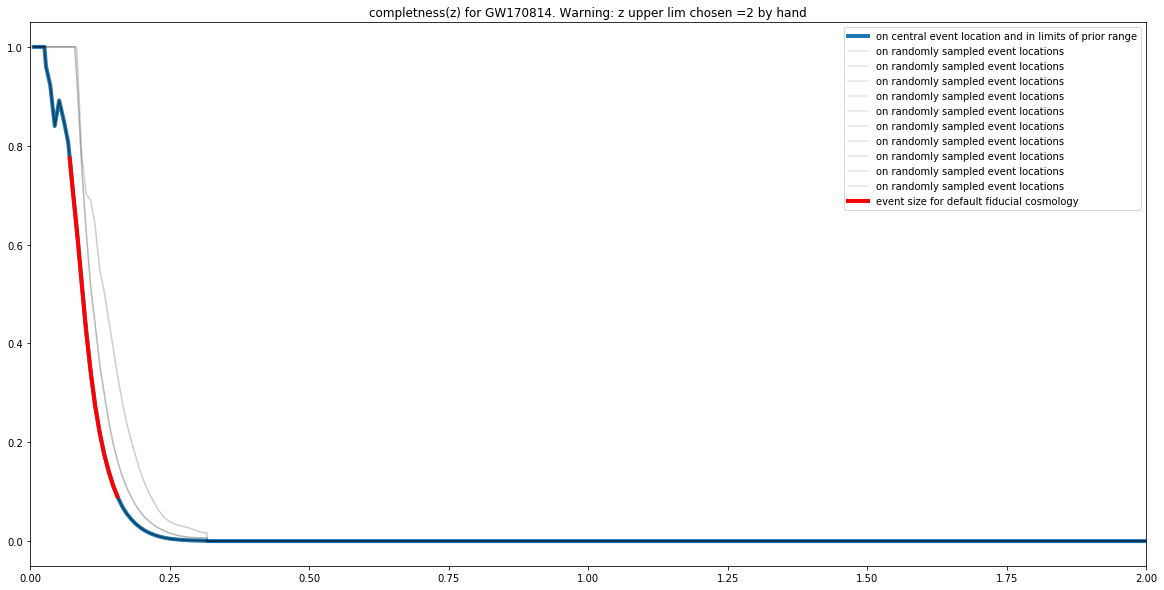

(921.1873415153384, 274.8474186868802, 1567.5272643437968, 215.44664094281939)


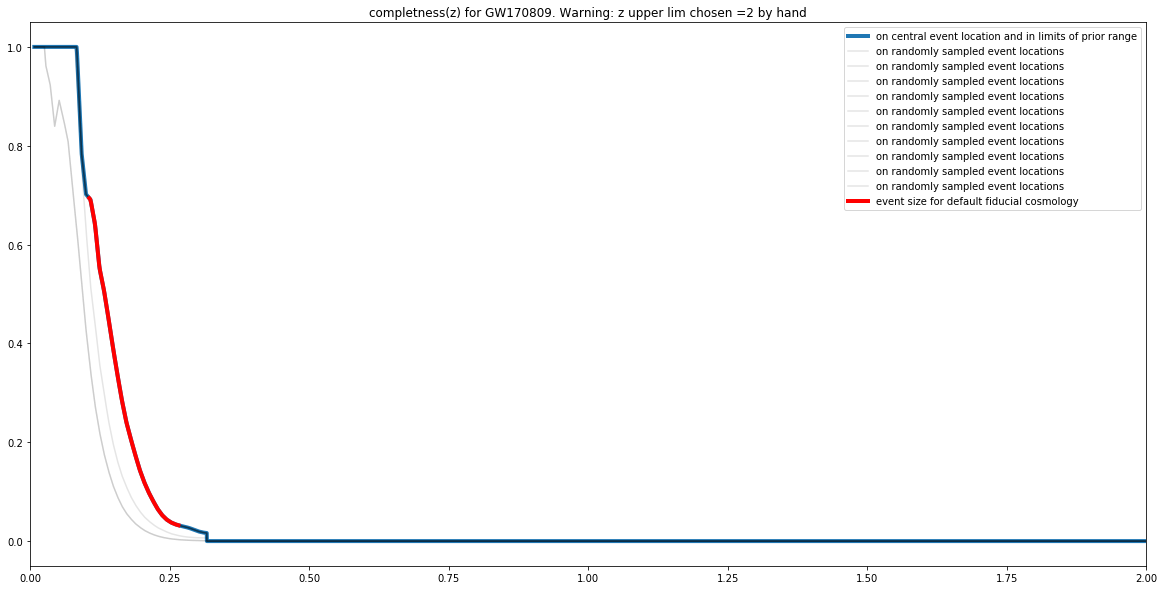

(827.9502441573047, 0, 1760.3954561111061, 310.81507065126715)


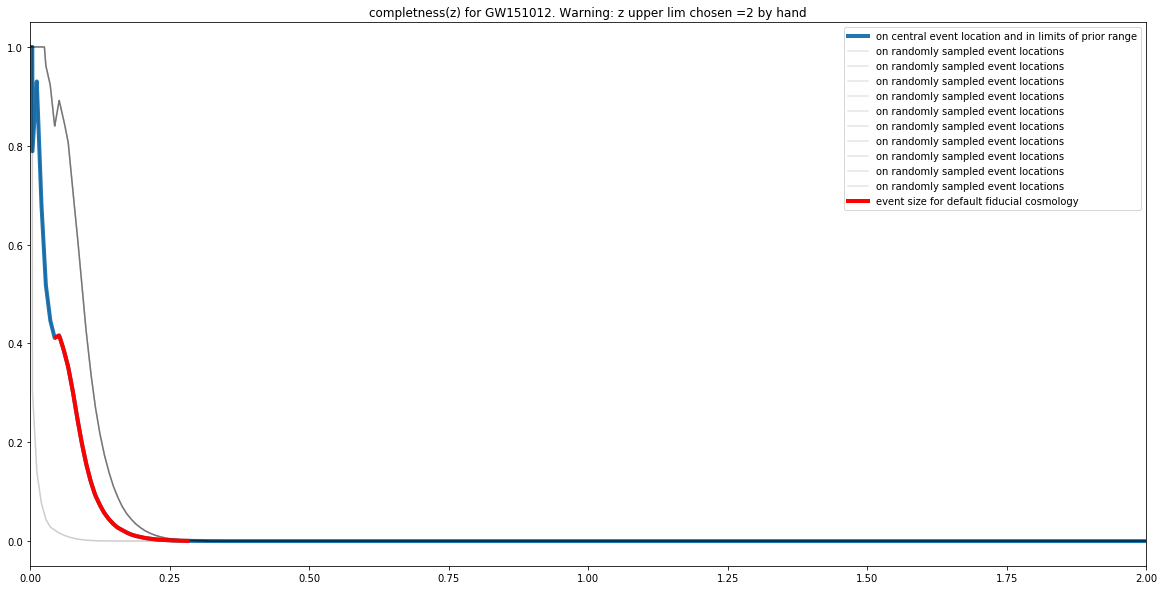

(814.4653884485853, 91.2475024871604, 1537.6832744100107, 241.07262865380835)


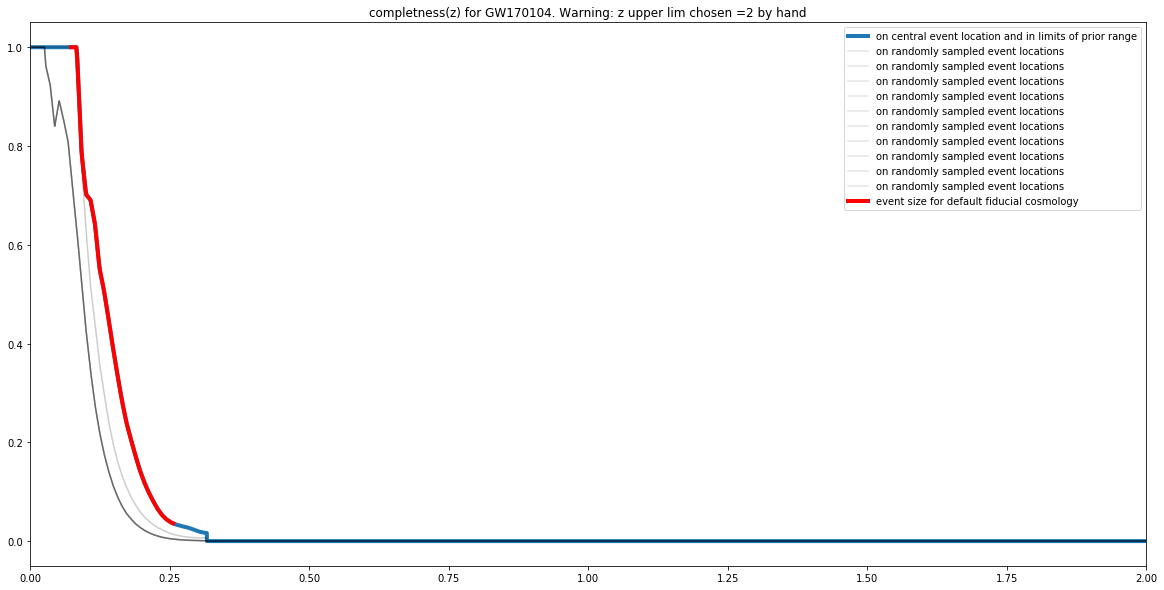

(1549.4027485447743, 0, 3130.6463881387367, 527.0812131979876)


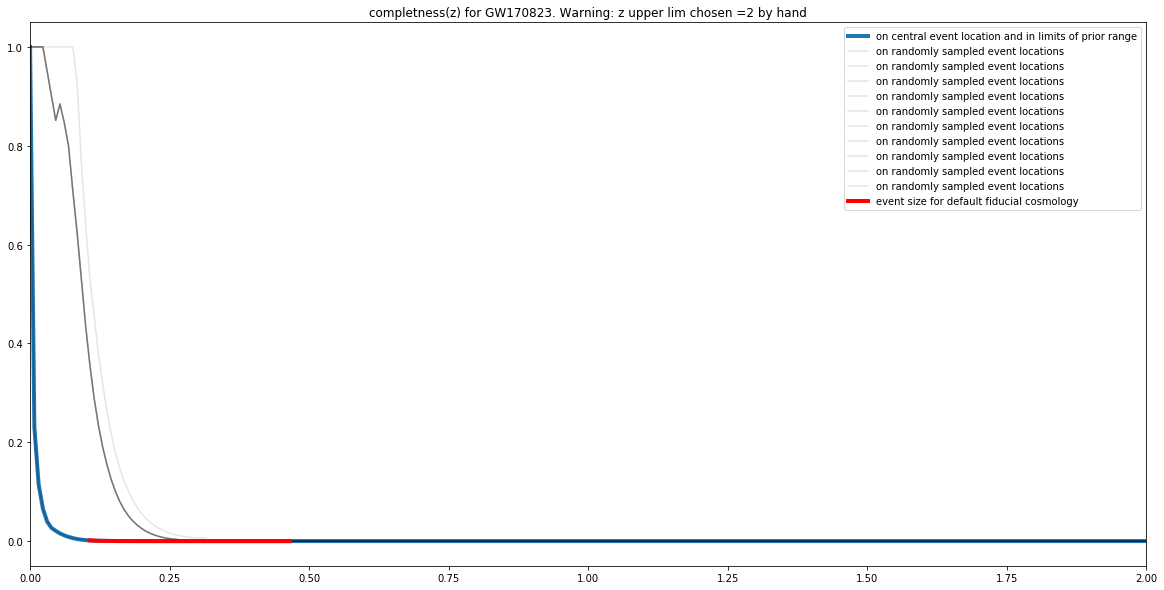

(391.7481097852163, 169.3700114497848, 614.1262081206477, 74.12603277847715)


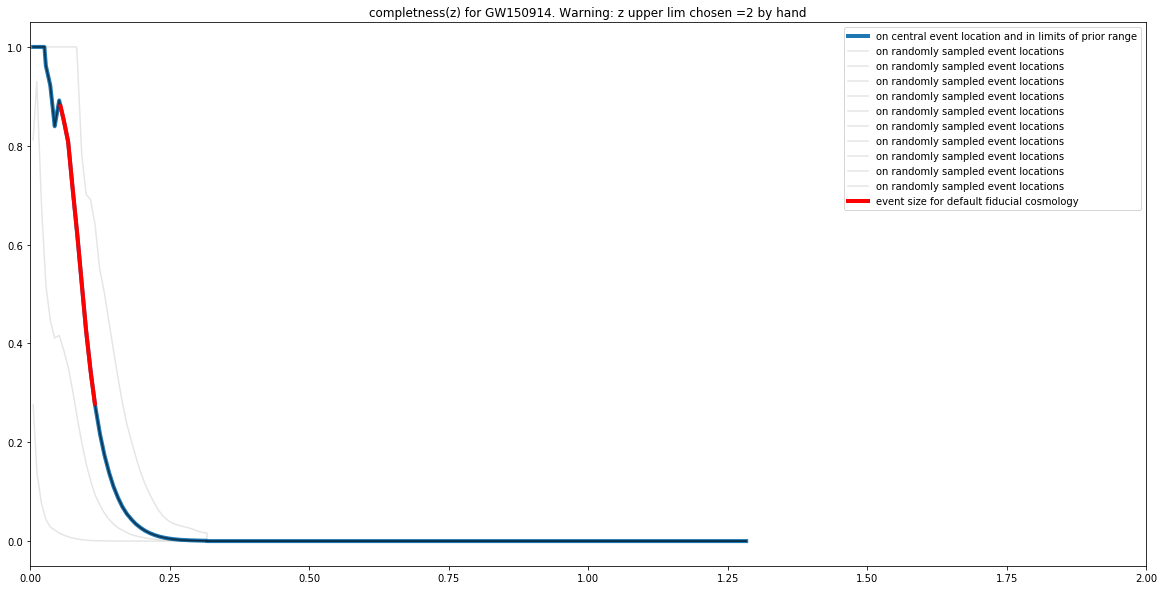

In [156]:
for key, ev in O2.items():
    plt.figure(figsize=(20,10))
    print(ev.find_r_loc())
    zmin, zmax = ev.get_z_lims()
    mu, l, u, sig = ev.find_r_loc(std_number=2)
    zl = z_from_dLGW(l, H0=70, Xi0=1, n=nGlob)
    zu = z_from_dLGW(u, H0=70, Xi0=1, n=nGlob)
    
    z = np.linspace(zmin, zmax, 10000)
    
    c = glade.completeness(*ev.find_event_coords(polarCoords=True), z)
    plt.plot(z, c, linewidth=4)
    #plt.show()
   
    nSamples = 10
    theta, phi, _ = ev.sample_posterior(nSamples=nSamples)
    c = glade.completeness(theta, phi, z)
    plt.plot(z, c.T, c='k', alpha=0.1)
    
    z = np.linspace(zl, zu, 100)
    c = glade.completeness(*ev.find_event_coords(polarCoords=True), z)
    plt.plot(z, c, linewidth=4, c='r')
    plt.title('completness(z) for ' + key  +'. Warning: z upper lim chosen =2 by hand')
    plt.legend(['on central event location and in limits of prior range'] + nSamples*['on randomly sampled event locations'] + ['event size for default fiducial cosmology'])
    #plt.ylim([0,1])
    plt.xlim([0,2])

    plt.show()

In [147]:
# default is mult-hom interpolation
gals = GalCompleted()
#gals = GalCompleted(completionType='mult')
#gals = GalCompleted(completionType='add')
gals.add_cat(glade)

## GWgal

This module contains the object GWgal. Its main attributes are :
- gals : a GalCompleted object
- GWevents: a dictionary {event name: Skymap3D} for the GW events

At initialization, two other attributes will be created:
- cred_pixels : a dictionary {event name: list of pixels of the credible region specified by credible_level (default 0.99)}
- z_lims : a dictionary {event name: (z_min, z_max) } where z_min, z_max are the min and max redshift for all prior ranges in H0 and Xi0 . This is computed using mean+-3sigma with mean and sigma the mu and std of the GW luminosity distance, taken from the header of the skymap 

In [157]:
myGWgal = GWgal(gals, O2)

## Computing posterior

In [160]:
# Compute likelihood for H0 on a grid
H0grid = np.linspace(5, 220, 30)
#H0grid = np.linspace(70, 70, 1)
#Xi0grid = np.linspace(0.3,10,60)
Xi0grid = np.linspace(1,1,1)

#If false, use diracs
myGWgal._galRedshiftErrors = True

# 400 gives reasonable but noisy results. Will need >> 10k for production 
myGWgal.nHomSamples = 1600


liks = myGWgal.get_lik(H0s=H0grid, Xi0s=Xi0grid, n=nGlob)



Restricting area of the catalogue to 26536 pixels with nside=256
39495 galaxies kept
Setting z range of the catalogue between 0.0028765267703757796, 2.3520032558079866
39495 galaxies kept
Restricting area of the catalogue to 6920 pixels with nside=1024
867 galaxies kept
Setting z range of the catalogue between 0.0006614434616676822, 0.04453453289741731
44 galaxies kept
Restricting area of the catalogue to 18624 pixels with nside=1024
1435 galaxies kept
Setting z range of the catalogue between 0.004814113283999359, 2.35327407654604
1435 galaxies kept
Restricting area of the catalogue to 41312 pixels with nside=512
18817 galaxies kept
Setting z range of the catalogue between 0.004571245615962642, 0.610445043339105
18804 galaxies kept
Restricting area of the catalogue to 50288 pixels with nside=1024
5162 galaxies kept
Setting z range of the catalogue between 0.006448038459792682, 2.3508139789581084
5160 galaxies kept
Restricting area of the catalogue to 36784 pixels with nside=512
22164 g

## Plot H0 results 

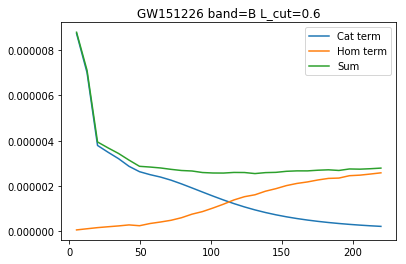

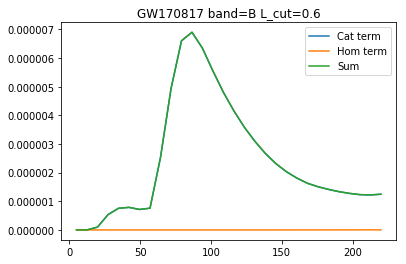

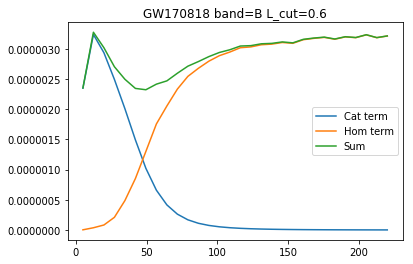

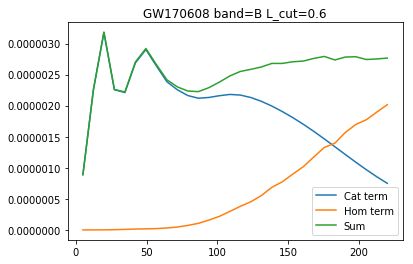

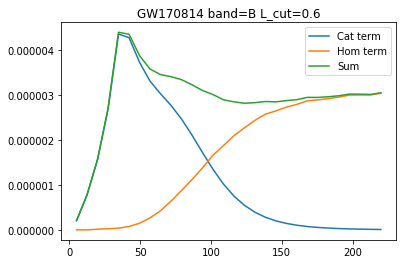

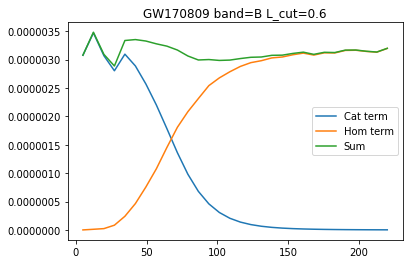

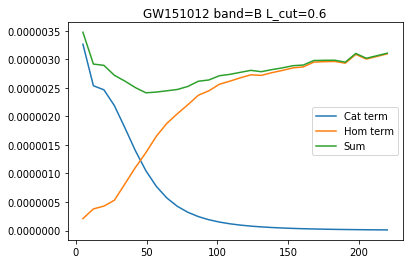

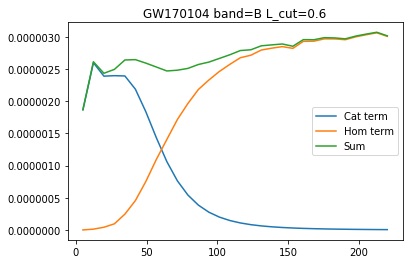

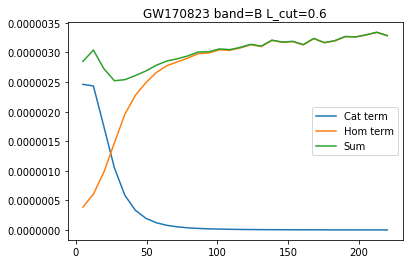

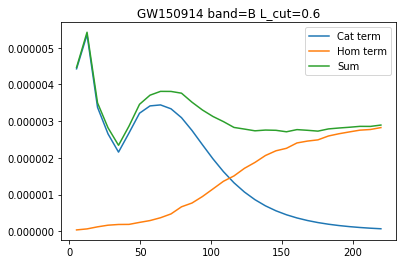

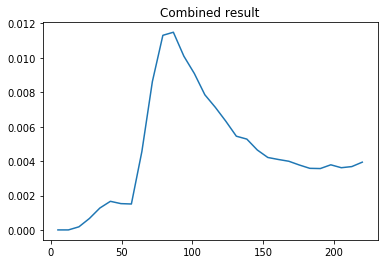

In [161]:


lik = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))
bet = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))

for key, val in liks.items():
    
    r, _, _, _ = O2[key].find_r_loc()

    beta = H0grid**3 / (1+np.array([z_from_dLGW(r*1.5, Xi0=1, n=nGlob, H0 = h) for h in H0grid]))**3
    
    #plt.figure(figsize=(15,7))
    plt.plot(H0grid, val[0]/beta)
    plt.plot(H0grid, 1*val[1]/beta)
    plt.plot(H0grid, (val[0]+1*val[1])/beta)
    plt.legend(["Cat term", "Hom term", "Sum"])
    plt.title( key + " band=" + band + " L_cut=" + str(Lcut) )
    plt.show()
    
    
    lik *= (val[0] + val[1] )
    bet *= beta

    
# # Plot the posterior with beta=H0^3
# plt.imshow(lik, extent=[Xi0grid[0],Xi0grid[-1],H0grid[0],H0grid[-1]])
# plt.colorbar()


# plt.show()




norm=np.trapz(lik/bet, H0grid)
plt.plot(H0grid, lik/bet/norm)
plt.title('Combined result')
plt.show()  

## Plot Xi0 results

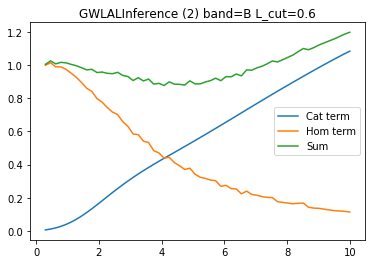

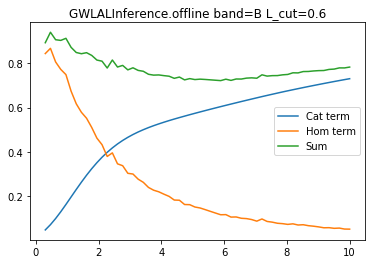

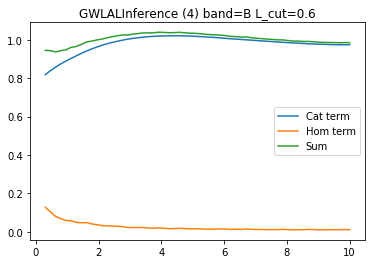

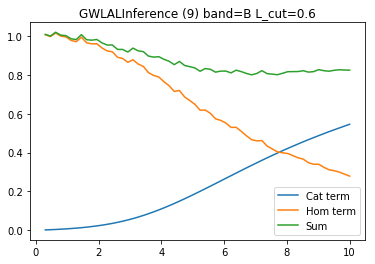

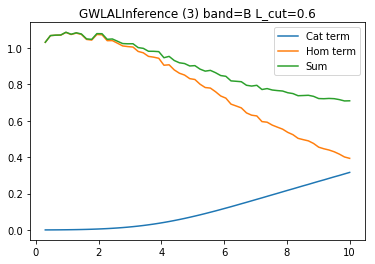

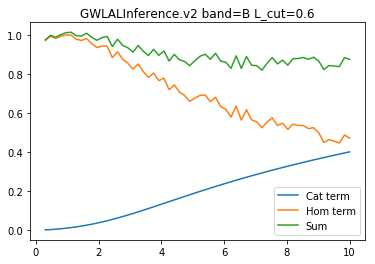

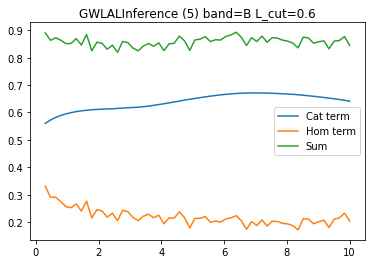

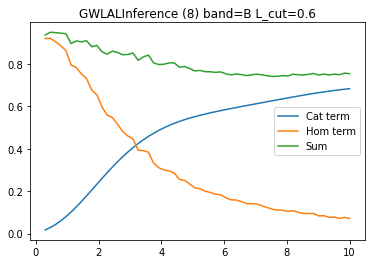

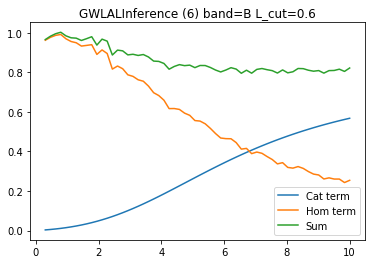

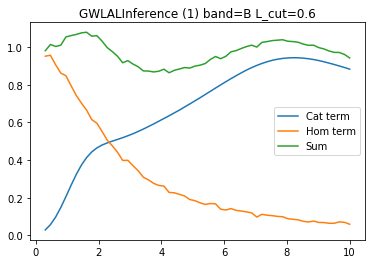

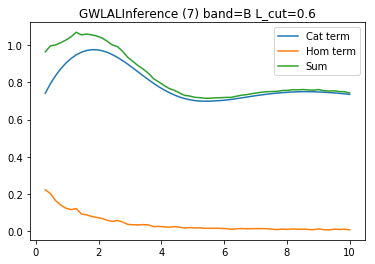

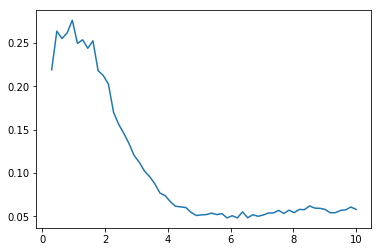

In [129]:


lik = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))
bet = np.squeeze(np.ones((H0grid.size, Xi0grid.size)))

for key, val in liks.items():

    r, _, _, _ = O2[key].find_r_loc()
    #d = O2[key].d_max()
    d = r*1.5
    beta = 1 / np.array([Xi(z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70), Xi0, n=nGlob)*(1+z_from_dLGW(d, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
    #beta = 1 / (1+np.array([z_from_dLGW(r*1.5, Xi0=Xi0, n=nGlob, H0 = 70) for Xi0 in Xi0grid]))**3
    #plt.figure(figsize=(20,10))
    plt.plot(Xi0grid, val[0]/beta)
    plt.plot(Xi0grid, 1*val[1]/beta)
    plt.plot(Xi0grid, (val[0]+1*val[1])/beta)

    plt.legend(["Cat term", "Hom term", "Sum"])
    plt.title( key + " band=" + band + " L_cut=" + str(Lcut) )
    plt.show()
    
    
    lik *= (val[0] + val[1] )
    bet *= beta

    
norm=np.trapz(lik/bet, Xi0grid)
plt.plot(Xi0grid, lik/bet/norm)
plt.show()

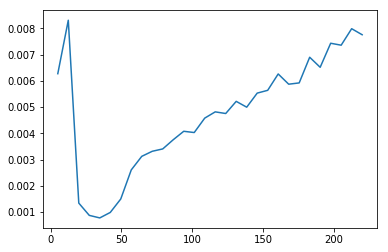

In [133]:
# # Plot the posterior with beta=H0^3
# plt.imshow(lik, extent=[Xi0grid[0],Xi0grid[-1],H0grid[0],H0grid[-1]])
# plt.colorbar()


# plt.show()


# norm=np.trapz(lik[:,0]/H0grid**3, H0grid)
# plt.plot(H0grid, lik[:,0]/H0grid**3/norm)
# plt.show()

norm=np.trapz(lik/bet, H0grid)
plt.plot(H0grid, lik/bet/norm)
plt.show()

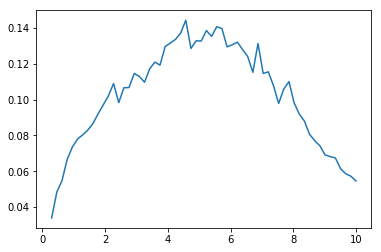

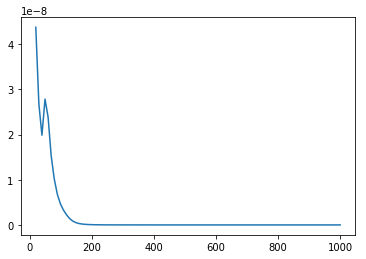

In [170]:
plt.plot(H0grid[:], lik_inhom[:]/H0grid[:]**6)

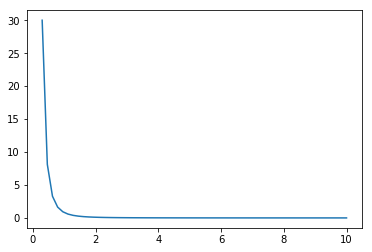

In [97]:
beta = 1 / np.array([Xi0*(1+z_from_dLGW(300, Xi0=Xi0, n=nGlob, H0 = 70)) for Xi0 in Xi0grid])**3
plt.plot(Xi0grid, beta)

In [253]:
gals.eval_hom(theta = np.array([0, 0, 1,1]), phi = np.array([0,1, 0, 1]), z=np.array(4*[0.1]))

array([0.99284882, 0.99284882, 0.97867915, 0.98610612])

In [263]:
dVdcom_dVdLGW(0.1, H0=70, Xi0=1, n=nGlob)

0.687305805934098